<a href="https://colab.research.google.com/github/hernansalinas/autogrades/blob/main/Actividades_clase/Actividad_10_Euler.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ejercicio: Simulación de un Péndulo Simple con el Método de Euler y RungeKutta

## Objetivo
Simular el movimiento de un péndulo simple  con fricción utilizando el método de Euler y Runge Kutta para resolver las ecuaciones diferenciales que describen su movimiento.

## Descripción del Péndulo Simple
Un péndulo simple consiste en una masa puntual suspendida de un hilo inextensible y sin masa en el cual  la masa oscila bajo la influencia de la gravedad.

## Ecuaciones del Movimiento
Las ecuaciones de movimiento de un péndulo simple de longitud L, en presencia de  fricción, vienen dadas por :

1. Ecuación diferencial de la posición angular:

\begin{equation}
\frac{d^2\theta}{dt^2} + \frac{g}{L}\sin(\theta) + \gamma L \frac{d\theta}{dt}= 0
\end{equation}

donde $\theta$ es el ángulo de desplazamiento, $g=9.8$m/s la aceleración de la gravedad  y  \gamma la constante de amortigüamiento.

2. La ecuación diferencial se puede separar en dos ecuaciones de primer orden:

\begin{equation}
\frac{d\theta}{dt} = \omega
\end{equation}
   
\begin{equation}
\frac{d\omega}{dt} = -\frac{g}{L}\theta - \gamma L \omega
\end{equation}


## Parámetros
- $g$: Aceleración debido a la gravedad (9.81 $m/s^2$)
- $L$: Longitud del hilo del péndulo (en metros)
- $\theta_0$: Ángulo inicial de desplazamiento (en radianes)
- $\omega_0$: Velocidad angular inicial (en radianes/segundo)
- $\Delta t$: Paso de tiempo para la simulación (en segundos)
- $t_{max}$: Tiempo máximo de simulación (en segundos)

## Instrucciones
1. **Inicialización**:
   - Establezca los valores iniciales: $\theta = \theta_0$ y $\omega = \omega_0$.
   - Defina el intervalo de tiempo $\Delta t$ y el tiempo total de simulación $t_{max}$.

2. **Aplicación del Método de Euler y Runge Kutta**:
   - Construya una función con funciones a integrar
   - Construya una función con el método euler y otra para el metodo de rungekutta.
   - Emplee la librería de integración odeint para validar la solución numérica.  
   - Emplee la solución teórica para validar todos los resultados anteriores.
     
3. **Resultados**:
   - Registre los valores de $\theta$ y $\omega$ para cada instante de tiempo.
   - Grafique $\theta$ y $\omega$ en función del tiempo para visualizar el movimiento del péndulo.
   - Encuentre una expresión para determinar la energía cinética, potencial y total del péndulo simple.

## Funciones a Implementar

### 1. `fun`: Función de las Ecuaciones del Péndulo Simple
Esta función calcula las derivadas de las variables de estado $\theta$ y $\omega\$ en un instante dado.


```python
def fun(theta, omega, g, L):
    """
    Calcula las derivadas del ángulo y la velocidad angular para un péndulo simple.

    Args:
        theta (float): Ángulo de desplazamiento (en radianes).
        omega (float): Velocidad angular (en radianes/segundo).
        g (float): Aceleración debida a la gravedad (en m/s²).
        L (float): Longitud del hilo del péndulo (en metros).

    Returns:
        Array: Derivadas de theta y omega.
    """
    dtheta_dt = ...
    domega_dt = ...
    return np.array([dtheta_dt, domega_dt])
```

## Preguntas
1. ¿Cómo afecta el paso de tiempo Δt a la precisión de la simulación?
2. ¿Qué sucede si el ángulo inicial $\theta_0$   no es pequeño? ¿Sigue siendo válida la aproximación $\sin \theta \approx \theta$
3. ¿Cómo varía el movimiento del péndulo con respecto a los parámetros $L$ y $\theta_0$
4. ¿Qué observas en la energía del sistema a lo largo del tiempo? ¿Se conserva?
5. ¿Qué diferencias encuentras si comparas los resultados obtenidos con el método de Euler con los obtenidos utilizando métodos más precisos él de Runge-Kutta?
6. Realizar una animación para del movimiento del pendulo simple, con las soluciones dadas en el metodo de RungeKutta.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

In [2]:

g = 9.81  #  gravedad (m/s^2)
L = 1.0  # longitud del hilo del péndulo (m), lo escogi por facilidad
theta_0 = np.radians(30)  # ángulo inicial escogido
omega_0 = 0.0  #  (rad/s)
gamma = 0.1  #  (s^-1)
Delta_t = 0.01  # (s)
t_max = 10.0  # (s)

# tiempo
t = np.arange(0, t_max, Delta_t)

In [5]:
def euler_metodo(theta_0, omega_0, t, L, g, gamma):
    theta = np.zeros_like(t)
    omega = np.zeros_like(t)
    theta[0] = theta_0
    omega[0] = omega_0

    for i in range(1, len(t)):
        theta[i] = theta[i-1] + Delta_t * omega[i-1]
        omega[i] = omega[i-1] - Delta_t * (g/L * np.sin(theta[i-1]) + gamma * omega[i-1])

    return theta, omega

In [6]:
def rk4_metodo(theta_0, omega_0, t, L, g, gamma):
    theta = np.zeros_like(t)
    omega = np.zeros_like(t)
    theta[0] = theta_0
    omega[0] = omega_0

    for i in range(1, len(t)):
        k1_theta = Delta_t * omega[i-1]
        k1_omega = Delta_t * (-g/L * np.sin(theta[i-1]) - gamma * omega[i-1])

        k2_theta = Delta_t * (omega[i-1] + 0.5 * k1_omega)
        k2_omega = Delta_t * (-g/L * np.sin(theta[i-1] + 0.5 * k1_theta) - gamma * (omega[i-1] + 0.5 * k1_omega))

        k3_theta = Delta_t * (omega[i-1] + 0.5 * k2_omega)
        k3_omega = Delta_t * (-g/L * np.sin(theta[i-1] + 0.5 * k2_theta) - gamma * (omega[i-1] + 0.5 * k2_omega))

        k4_theta = Delta_t * (omega[i-1] + k3_omega)
        k4_omega = Delta_t * (-g/L * np.sin(theta[i-1] + k3_theta) - gamma * (omega[i-1] + k3_omega))

        theta[i] = theta[i-1] + (1/6) * (k1_theta + 2*k2_theta + 2*k3_theta + k4_theta)
        omega[i] = omega[i-1] + (1/6) * (k1_omega + 2*k2_omega + 2*k3_omega + k4_omega)

    return theta, omega

In [12]:
def pendulo(y, t, L, g, gamma):
    theta, omega = y
    dydt = [omega, -g/L * np.sin(theta) - gamma * omega]
    return dydt

y0 = [theta_0, omega_0]
solucion = odeint(pendulo, y0, t, args=(L, g, gamma))
theta_odeint, omega_odeint = solucion.T


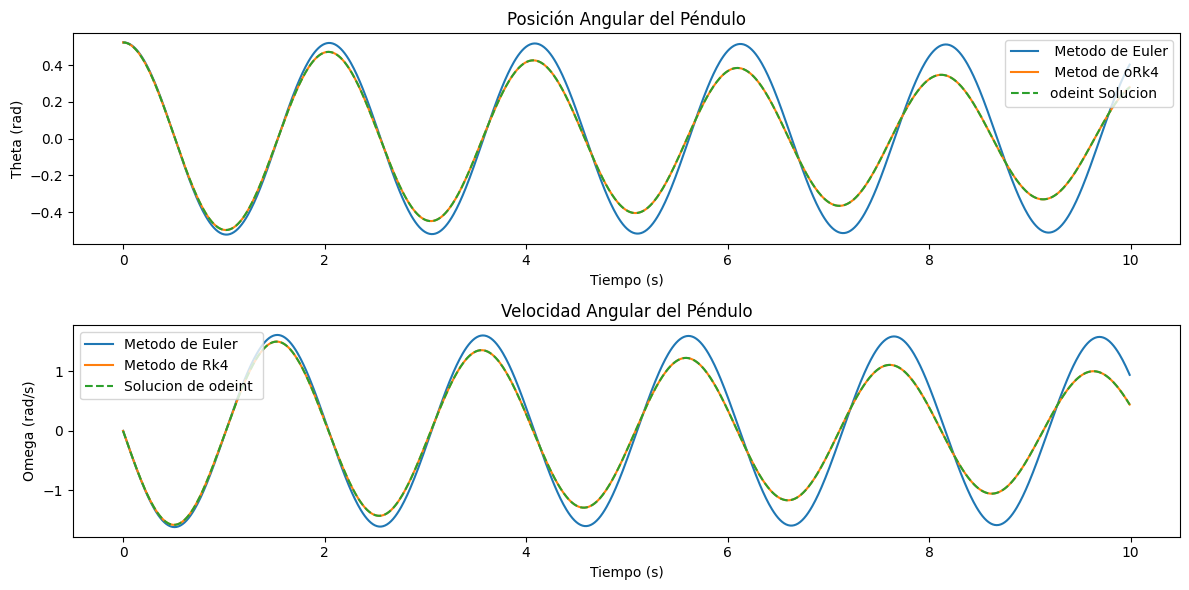

In [13]:

theta_euler, omega_euler = euler_metodo(theta_0, omega_0, t, L, g, gamma)
theta_runge_kutta, omega_runge_kutta = rk4_metodo(theta_0, omega_0, t, L, g, gamma)

# Grafica de los resultados
plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plt.plot(t, theta_euler, label=' Metodo de Euler')
plt.plot(t, theta_runge_kutta, label=' Metod de oRk4')
plt.plot(t, theta_odeint, label='odeint Solucion', linestyle='dashed')
plt.xlabel('Tiempo (s)')
plt.ylabel('Theta (rad)')
plt.title('Posición Angular del Péndulo')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(t, omega_euler, label='Metodo de Euler')
plt.plot(t, omega_runge_kutta, label='Metodo de Rk4')
plt.plot(t, omega_odeint, label='Solucion de odeint ', linestyle='dashed')
plt.xlabel('Tiempo (s)')
plt.ylabel('Omega (rad/s)')
plt.title('Velocidad Angular del Péndulo')
plt.legend()

plt.tight_layout()
plt.show()


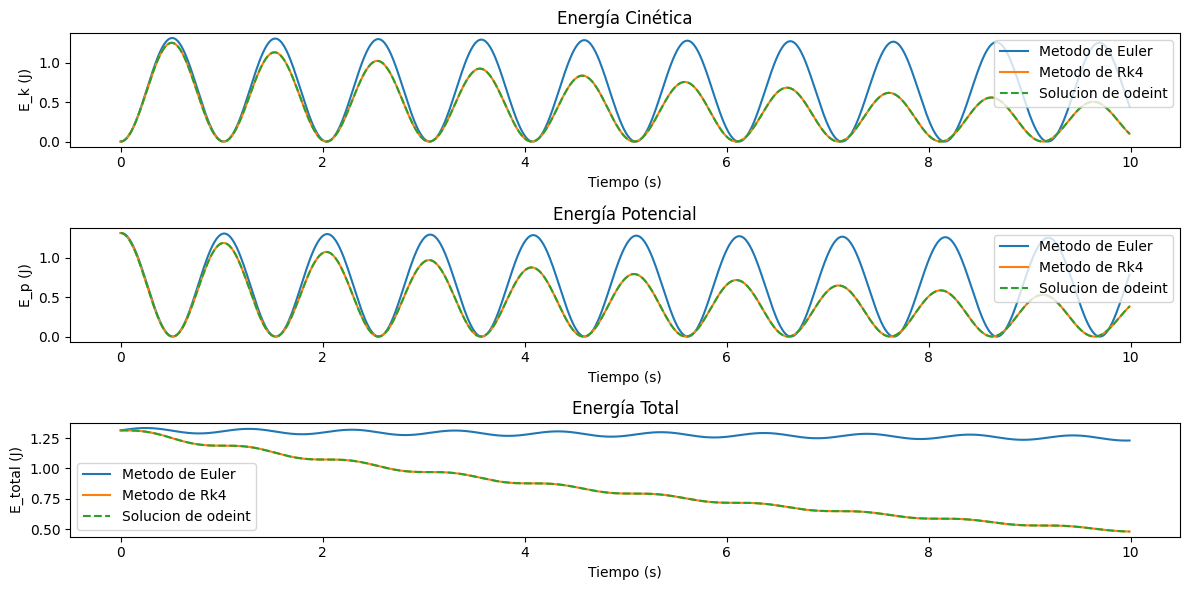

In [14]:
def energia_cinetica(L, omega):
    return 0.5 * (L * omega)**2

def energia_potencial(L, g, theta):
    return g * L * (1 - np.cos(theta))

E_k_euler = energia_cinetica(L, omega_euler)
E_p_euler = energia_potencial(L, g, theta_euler)
E_total_euler = E_k_euler + E_p_euler

E_k_runge_kutta = energia_cinetica(L, omega_runge_kutta)
E_p_runge_kutta = energia_potencial(L, g, theta_runge_kutta)
E_total_runge_kutta = E_k_runge_kutta + E_p_runge_kutta

E_k_odeint = energia_cinetica(L, omega_odeint)
E_p_odeint = energia_potencial(L, g, theta_odeint)
E_total_odeint = E_k_odeint + E_p_odeint

# Graficar las energías
plt.figure(figsize=(12, 6))

plt.subplot(3, 1, 1)
plt.plot(t, E_k_euler, label='Metodo de Euler')
plt.plot(t, E_k_runge_kutta, label='Metodo de Rk4')
plt.plot(t, E_k_odeint, label='Solucion de odeint', linestyle='dashed')
plt.xlabel('Tiempo (s)')
plt.ylabel('E_k (J)')
plt.title('Energía Cinética')
plt.legend()

plt.subplot(3, 1, 2)
plt.plot(t, E_p_euler, label='Metodo de Euler')
plt.plot(t, E_p_runge_kutta, label='Metodo de Rk4')
plt.plot(t, E_p_odeint, label='Solucion de odeint', linestyle='dashed')
plt.xlabel('Tiempo (s)')
plt.ylabel('E_p (J)')
plt.title('Energía Potencial')
plt.legend()

plt.subplot(3, 1, 3)
plt.plot(t, E_total_euler, label='Metodo de Euler')
plt.plot(t, E_total_runge_kutta, label='Metodo de Rk4')
plt.plot(t, E_total_odeint, label='Solucion de odeint', linestyle='dashed')
plt.xlabel('Tiempo (s)')
plt.ylabel('E_total (J)')
plt.title('Energía Total')
plt.legend()

plt.tight_layout()
plt.show()


## Preguntas
1. ¿Cómo afecta el paso de tiempo Δt a la precisión de la simulación?
2. ¿Qué sucede si el ángulo inicial $\theta_0$   no es pequeño? ¿Sigue siendo válida la aproximación $\sin \theta \approx \theta$
3. ¿Cómo varía el movimiento del péndulo con respecto a los parámetros $L$ y $\theta_0$
4. ¿Qué observas en la energía del sistema a lo largo del tiempo? ¿Se conserva?
5. ¿Qué diferencias encuentras si comparas los resultados obtenidos con el método de Euler con los obtenidos utilizando métodos más precisos él de Runge-Kutta?
6. Realizar una animación para del movimiento del pendulo simple, con las soluciones dadas en el metodo de RungeKutta.


## Respuestas
1. Dependiendo del metodo el paso del tiempo va aumentando el error y la precision de la solucion

2. No es valida porque hay que tener consideraciones mayores, si tomamos encuenta de que la funcion seno se puede ver como una serie de taylor.
3. El movimiento del péndulo varía significativamente con respecto a los parámetros \( L \) y \( $\theta_0$). Un péndulo con una longitud mayor oscila más lentamente, ya que el período de oscilación aumenta con \( L \). Por otro lado, un ángulo inicial mayor ($\theta_0$) incrementa la energía inicial del sistema y puede llevar a un comportamiento más no lineal, especialmente si el ángulo es grande.
4. La energía total del sistema no se conserva debido a la presencia de fricción. A medida que el tiempo avanza, la energía total disminuye gradualmente, lo que refleja la disipación de energía en forma de calor. Esta pérdida de energía se manifiesta en la reducción de la amplitud de las oscilaciones del péndulo con el tiempo.
5. Al comparar los métodos, el método de Euler es más sencillo pero menos preciso y estable. Tiende a introducir errores significativos, especialmente con pasos de tiempo grandes. El método de Runge-Kutta de 4º orden es mucho más preciso y estable, proporcionando soluciones que se alinean mejor con las soluciones exactas y mostrando una mejor conservación de la energía en sistemas ideales y una disipación más realista en sistemas con fricción.